In [42]:
# import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('dataset/train.csv')

df.tail()

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200
987999,20230530,A238490,힘스,2611843,6410,8220,6300,8220


In [44]:
df = df.loc[df.종목명 =='농심']

In [45]:
df.columns = ['Date','1','2','Volume','Open','High','Low','Close']
df


,Date,1,2,Volume,Open,High,Low,Close
354,20210601,A004370,농심,43523,304500,308500,302000,304000
2354,20210602,A004370,농심,44209,305500,305500,303000,304500
4354,20210603,A004370,농심,42938,305000,305500,301000,301500
6354,20210604,A004370,농심,23786,301500,303500,300500,302000
8354,20210607,A004370,농심,31561,304500,304500,302000,303500
...,...,...,...,...,...,...,...,...
978354,20230523,A004370,농심,19553,409000,415000,409000,414000
980354,20230524,A004370,농심,32971,418000,437000,416000,430000
982354,20230525,A004370,농심,21698,426500,438000,424000,431500
984354,20230526,A004370,농심,12410,427000,437000,426500,430000


In [46]:
df.shape

(494, 8)

In [47]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [48]:
dfx = df[['Open', 'High', 'Low', 'Close', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

dfx

,Open,High,Low,Volume
354,0.242690,0.240469,0.239394,0.187589
2354,0.248538,0.222874,0.245455,0.190905
4354,0.245614,0.222874,0.233333,0.184761
6354,0.225146,0.211144,0.230303,0.092177
8354,0.242690,0.217009,0.239394,0.129763
...,...,...,...,...
978354,0.853801,0.865103,0.887879,0.071714
980354,0.906433,0.994135,0.930303,0.136579
982354,0.956140,1.000000,0.978788,0.082084
984354,0.959064,0.994135,0.993939,0.037184


In [49]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.309799,0.307063,0.301497,0.092030
std,0.195011,0.201708,0.199647,0.099725
min,0.000000,0.000000,0.000000,0.000000
25%,0.167398,0.158358,0.157576,0.039137
50%,0.261696,0.259531,0.248485,0.062800
75%,0.397661,0.401026,0.390909,0.105991
max,1.000000,1.000000,1.000000,1.000000


In [50]:
dfy.head()

,Close
354,0.236527
2354,0.239521
4354,0.221557
6354,0.224551
8354,0.233533


In [51]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)


In [52]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(484, 10, 4)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((324, 10, 4), (160, 10, 4), (324, 1), (160, 1))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [55]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10, 20)            500       
                                                                 
 dropout_2 (Dropout)         (None, 10, 20)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1341 (5.24 KB)
Trainable params: 1341 (5.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(loss='mse', optimizer='adam')

In [57]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500


7/7 [==============================] - 2s 48ms/step - loss: 0.0285 - val_loss: 0.0046
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0289 - val_loss: 0.0045
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0330 - val_loss: 0.0042
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0196 - val_loss: 0.0042
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0173 - val_loss: 0.0044
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0162 - val_loss: 0.0046
Epoch 7/500
7/7 [==============================] - 0s 10ms/step - loss: 0.0183 - val_loss: 0.0047
Epoch 8/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0120 - val_loss: 0.0048
Epoch 9/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0142 - val_loss: 0.0048
Epoch 10/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0115 - val_loss: 0.0048
Epoch 11/500
7/7 [=====================

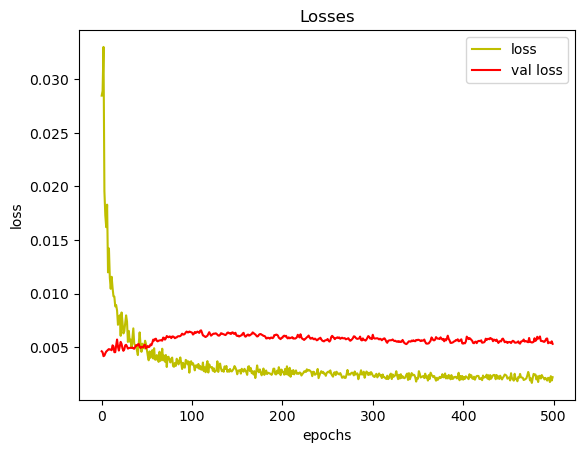

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


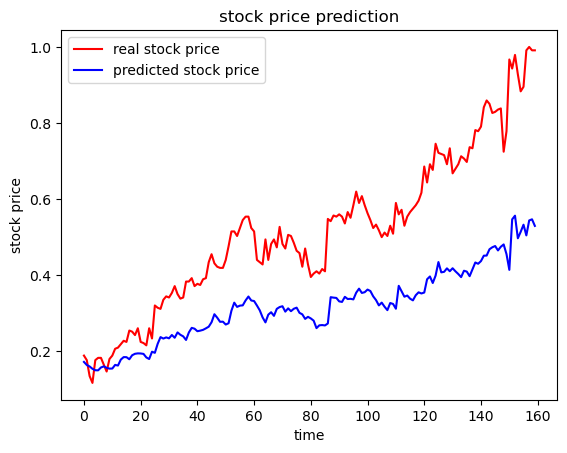

In [60]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [63]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_6 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_4

In [64]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.33, shuffle=False)

Epoch 1/500
7/7 [==============================] - 3s 70ms/step - loss: 0.0611 - val_loss: 0.0151
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0432 - val_loss: 0.0088
Epoch 3/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0273 - val_loss: 0.0047
Epoch 4/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0139 - val_loss: 0.0048
Epoch 5/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.0098
Epoch 6/500
7/7 [==============================] - 0s 22ms/step - loss: 0.0064 - val_loss: 0.0123
Epoch 7/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0095
Epoch 8/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0056 - val_loss: 0.0073
Epoch 9/500
7/7 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0067
Epoch 10/500
7/7 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0070
Epoch 11/500
7/7 [=

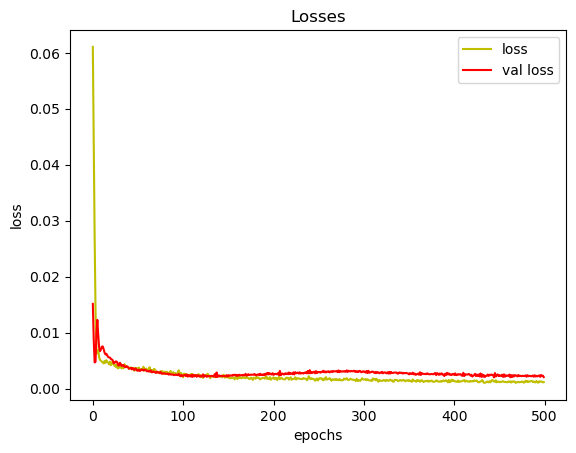

In [65]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


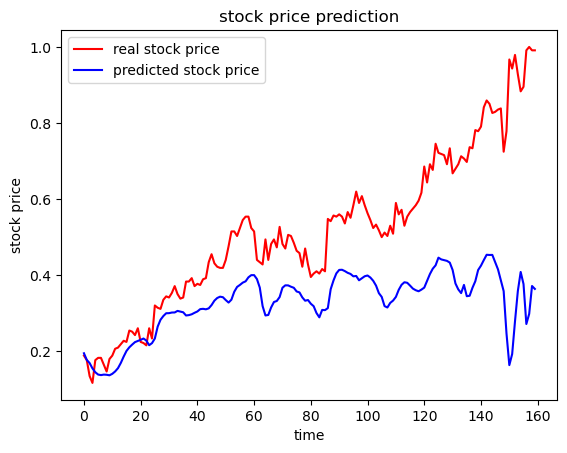

In [67]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()